In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Monomial basis

Text(0.5, 0, 'x')

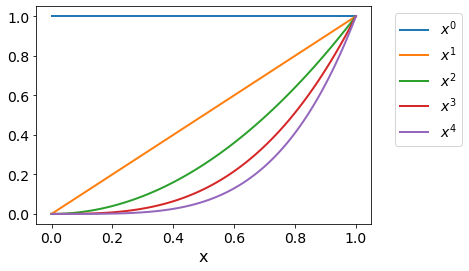

In [2]:
x  = np.linspace(0,1,100)

for j in range(5):
    plt.plot(x, x**j, lw = 2, label = '$x^{%d}$' %(j))
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 14)
plt.xlabel('x', fontsize = 16)

Suppose we interpolate the function 

$$ f = 2x + x\sin(40x) \qquad x \in [0,1] $$
at the points $x_j = j/10$ for $j=0,\dots,10$.

In [3]:
n  = 10
xj = np.arange(n+1)/n
func  = lambda x: 2*x + x*np.sin(40*x)

# Construct linear system
A = np.vander(xj)
b = func(xj)
c = np.linalg.solve(A, b)
print('The coefficients are')
print(c[:,np.newaxis])

The coefficients are
[[-5.99575080e+05]
 [ 2.96898965e+06]
 [-6.27774292e+06]
 [ 7.40091486e+06]
 [-5.32815495e+06]
 [ 2.41136083e+06]
 [-6.79937111e+05]
 [ 1.13946070e+05]
 [-1.01618420e+04]
 [ 3.63247052e+02]
 [ 0.00000000e+00]]


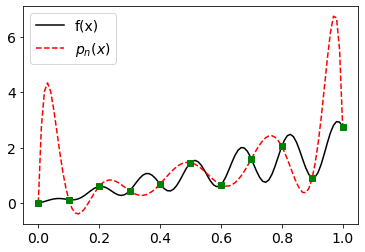

In [4]:
plt.plot(x, func(x), 'k-', x, np.polyval(c, x), 'r--')
plt.plot( xj, func(xj), 'gs')
plt.legend(('f(x)', '$p_n(x)$'), fontsize = 14)

#### Monomial bases at unevenly spaced points

Polynomial interpolation suffers when we take evenly spaced points. We will see this again in a few lectures. A way to mitigate this is by taking non-uniform points (Chebyshev points). That mitigates the issue up to a point. The main message is that using monomial basis is fundamentally bad from a numerical perspective. 

Text(0.5, 1.0, 'Chebyshev points')

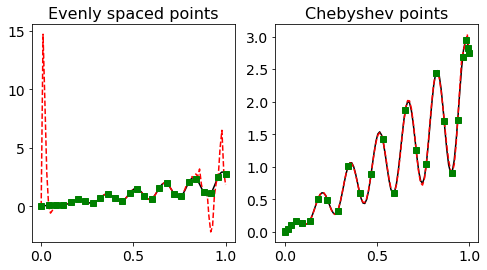

In [5]:
n  = 25
f, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
xj = np.arange(n+1)/n
A = np.vander(xj)
b = func(xj)
c = np.linalg.solve(A, b)
ax1.plot(x, func(x), 'k-', x, np.polyval(c,x), 'r--')
ax1.plot(xj, func(xj), 'gs')
ax1.set_title('Evenly spaced points', fontsize = 16)
xj = 0.5*np.cos(np.arange(n+1)*np.pi/n)+0.5
A = np.vander(xj)
b = func(xj)
c = np.linalg.solve(A, b)
ax2.plot(x, func(x), 'k-', x, np.polyval(c,x), 'r--')
ax2.plot(xj, func(xj), 'gs')
ax2.set_title('Chebyshev points', fontsize = 16)

### Newton's interpolation method

We plot the first five Newton's polynomials compute at the points $x_j = j /10$ for $j=0,\dots,10$.

Text(0.5, 1.0, 'First 5 Newton basis vectors')

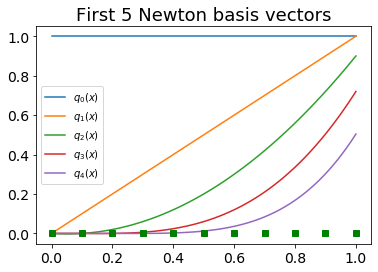

In [6]:
xj = np.arange(11)/10
for j in range(5):
    qj = np.ones_like(x)
    for k in range(j):
        qj *= (x-xj[k]) 
    plt.plot(x, qj, label = '$q_{%d}(x)$' % (j))
plt.plot(xj, 0*xj, 'gs')
plt.legend()
plt.title('First 5 Newton basis vectors', fontsize = 18)

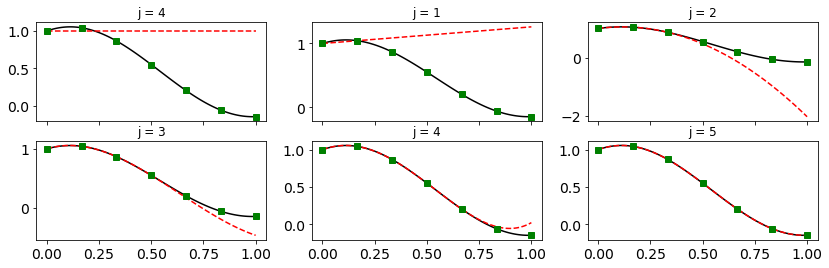

In [7]:
n = 6
xj = np.arange(n+1)/n

nfunc = lambda x:np.sin(x) + np.cos(3*x)
fj = nfunc(xj)

x  = np.linspace(0,1,100)

fig, axarray = plt.subplots(2,3, sharex = True, figsize = (14,4))
axflat = axarray.flatten()

def poly_newton_coefficient(x, f):
    """
    Warning: Both inefficient and numerically unstable
    """
    n = x.size
    A = np.ones((n,n), dtype = 'd')
    b = f

    for j in range(1,n):
        for k in range(j):
            A[j:,j] *= x[j:]-x[k]
    
    return np.linalg.solve(np.tril(A), b)


cj = poly_newton_coefficient(xj, fj)

qjt = np.ones_like(x)
fp = cj[0]*qjt
axflat[0].plot(x, nfunc(x), 'k-', x, fp, 'r--')
axflat[0].plot(xj, fj, 'gs')
axflat[0].set_title('j = %d' %j)
for j in range(1,6):
    qjt *= (x-xj[j-1])
    fp += cj[j]*qjt

    #Plot the interpolant
    axflat[j].plot(x, nfunc(x), 'k-', x, fp, 'r--')
    axflat[j].plot(xj, fj, 'gs')
    axflat[j].set_title('j = %d' %j)
    



### Lagrange interpolation

This is typically implemented in MATLAB/Python, so please use those functionalities. 

Text(0.5, 1.0, 'First 5 Lagrange basis vectors')

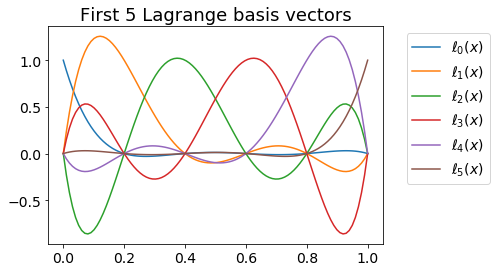

In [8]:
xj = np.arange(6)/5
x = np.linspace(0,1,100)

for j in range(6):
    lj = np.ones_like(x)
    for k in range(6):
        if k != j:
            lj *= (x-xj[k])/(xj[j]-xj[k])
    plt.plot(x, lj, label = '$\ell_{%d}(x)$' % (j))
plt.legend(bbox_to_anchor=(1.05, 1), fontsize = 14)
plt.title('First 5 Lagrange basis vectors', fontsize = 18)

Text(0.5, 1.0, 'Chebyshev points')

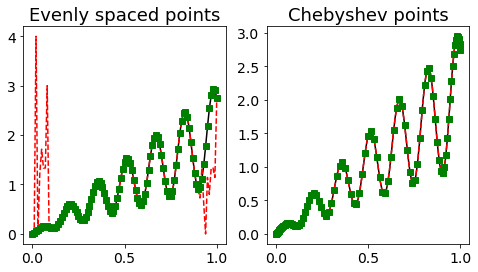

In [15]:
from scipy.interpolate import barycentric_interpolate, lagrange
n = 100

f, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
xj = np.arange(n+1)/n
ax1.plot(x, func(x), 'k-', x, barycentric_interpolate(xj,func(xj), x), 'r--')
ax1.plot(xj, func(xj), 'gs')
ax1.set_title('Evenly spaced points', fontsize = 18)


xj = 0.5*np.cos(np.arange(n+1)*np.pi/n)+0.5
ax2.plot(x, func(x), 'k-', x, barycentric_interpolate(xj,func(xj), x), 'r--')
ax2.plot(xj, func(xj), 'gs')
ax2.set_title('Chebyshev points', fontsize = 18)